In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [3]:
onion_yield_path = "/Users/rashidkarimov/Desktop/agro/data/processed/analysis/statistics_committee/onion_yield_features.csv"   
potato_yield_path = "/Users/rashidkarimov/Desktop/agro/data/processed/analysis/statistics_committee/potato_yield_features.csv" 

onion_df = pd.read_csv(onion_yield_path)
potato_df = pd.read_csv(potato_yield_path)

if 'onion_yield' in onion_df.columns:
    onion_df.rename(columns={'onion_yield': 'Yield'}, inplace=True)
if 'potato_yield' in potato_df.columns:
    potato_df.rename(columns={'potato_yield': 'Yield'}, inplace=True)

onion_df['Crop'] = 'Onion'
potato_df['Crop'] = 'Potato'

df = pd.concat([onion_df, potato_df], ignore_index=True)
df = df[df['Setting'] != "Republic of Azerbaijan"] 

df.dropna(subset=['Setting','year','Yield','first5_sum','last5_sum','growth','std_dev','cagr'], inplace=True)
df.head()


,Setting,year,Yield,first5_sum,last5_sum,growth,std_dev,cagr,Crop
1,Baku city,2000,69.0,309.0,461.8,152.8,61.365082,0.015731,Onion
2,Nakhchivan Autonomous Republic,2000,75.0,463.0,828.4,365.4,39.547176,0.059550,Onion
4,Babak district,2000,41.0,466.0,611.9,145.9,39.320771,0.044049,Onion
5,Julfa district,2000,85.0,450.0,430.2,-19.8,34.683124,0.003447,Onion
7,Ordubad district,2000,42.0,251.0,417.9,166.9,13.953566,0.022458,Onion


In [ ]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 3008 entries, 1 to 4151
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Setting     3008 non-null   object 
 1   year        3008 non-null   int64  
 2   Yield       3008 non-null   float64
 3   first5_sum  3008 non-null   float64
 4   last5_sum   3008 non-null   float64
 5   growth      3008 non-null   float64
 6   std_dev     3008 non-null   float64
 7   cagr        3008 non-null   float64
 8   Crop        3008 non-null   object 
dtypes: float64(6), int64(1), object(2)
memory usage: 235.0+ KB


,year,Yield,first5_sum,last5_sum,growth,std_dev,cagr
count,3008.000000,3008.000000,3008.000000,3008.000000,3008.000000,3008.000000,3008.000000
mean,2011.530918,116.578145,453.338431,724.310818,270.972387,30.850118,0.029401
std,6.932501,54.506895,168.077218,350.615292,304.452230,22.714675,0.026772
min,2000.000000,2.000000,27.000000,60.700000,-256.300000,2.129499,-0.062129
25%,2006.000000,84.000000,337.000000,500.300000,98.100000,15.140037,0.011685
50%,2012.000000,105.000000,439.000000,624.700000,197.700000,25.046591,0.028239
75%,2018.000000,142.000000,549.000000,828.400000,366.300000,41.665667,0.044770
max,2023.000000,493.200000,928.000000,2195.300000,1588.200000,126.225609,0.127117


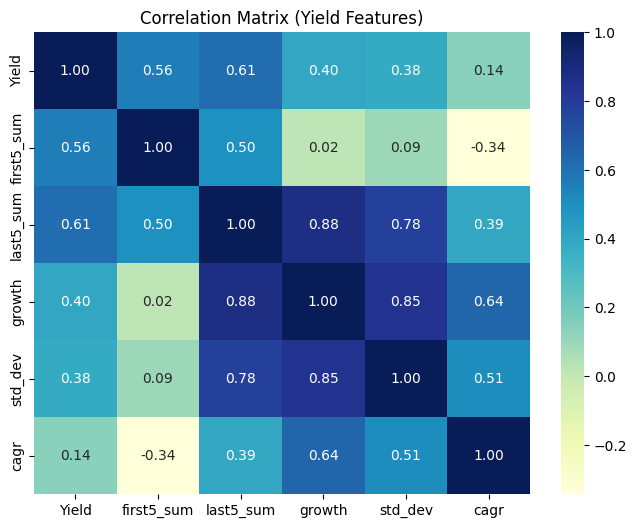

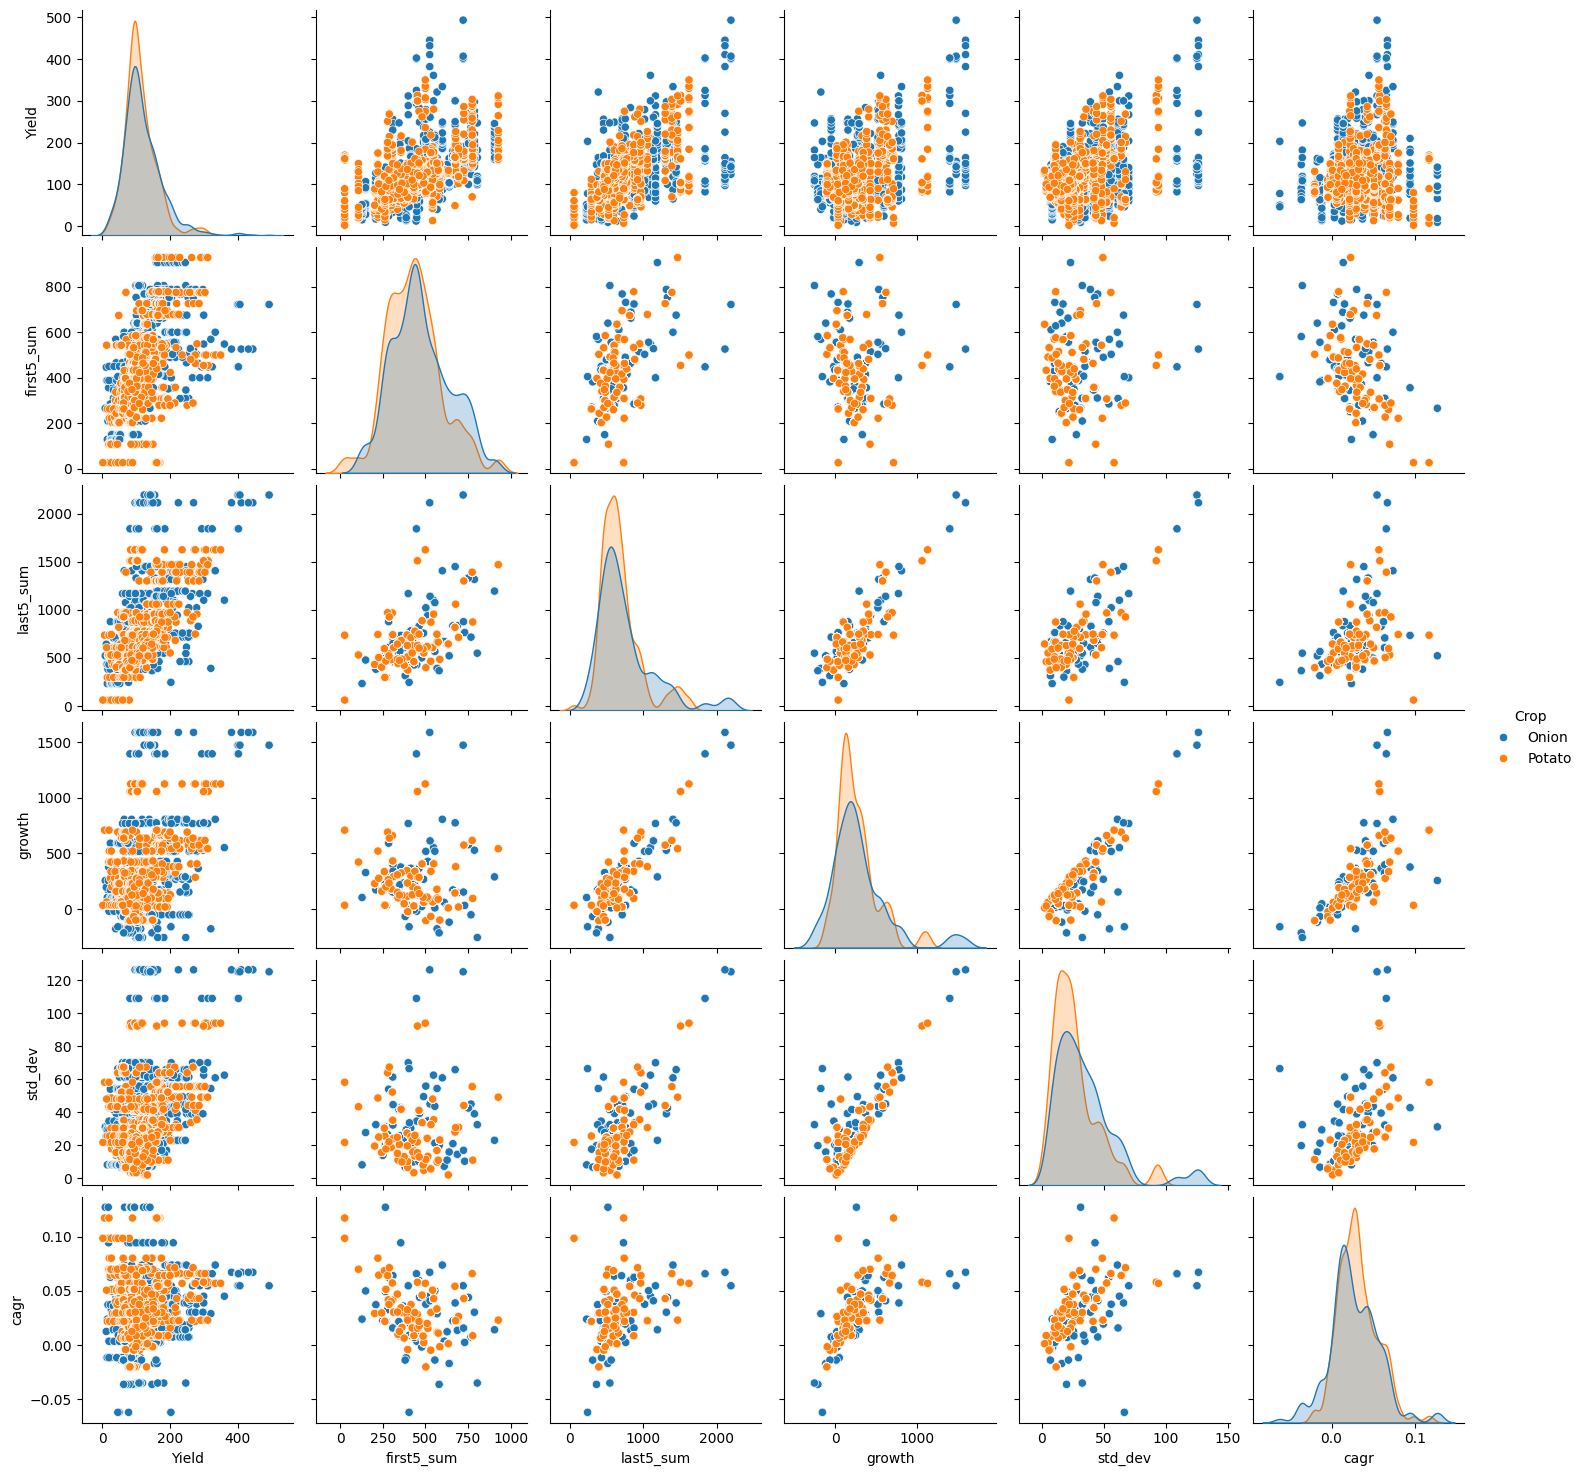

In [5]:
num_cols = ['Yield','first5_sum','last5_sum','growth','std_dev','cagr']
corr = df[num_cols].corr(numeric_only=True)
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='YlGnBu', fmt='.2f')
plt.title("Correlation Matrix (Yield Features)")
plt.show()

sns.pairplot(df[num_cols + ['Crop']], hue='Crop')
plt.show()


/var/folders/rd/v7chfg_s48s67l7bpbm9w9180000gn/T/ipykernel_2353/3742061541.py:13: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


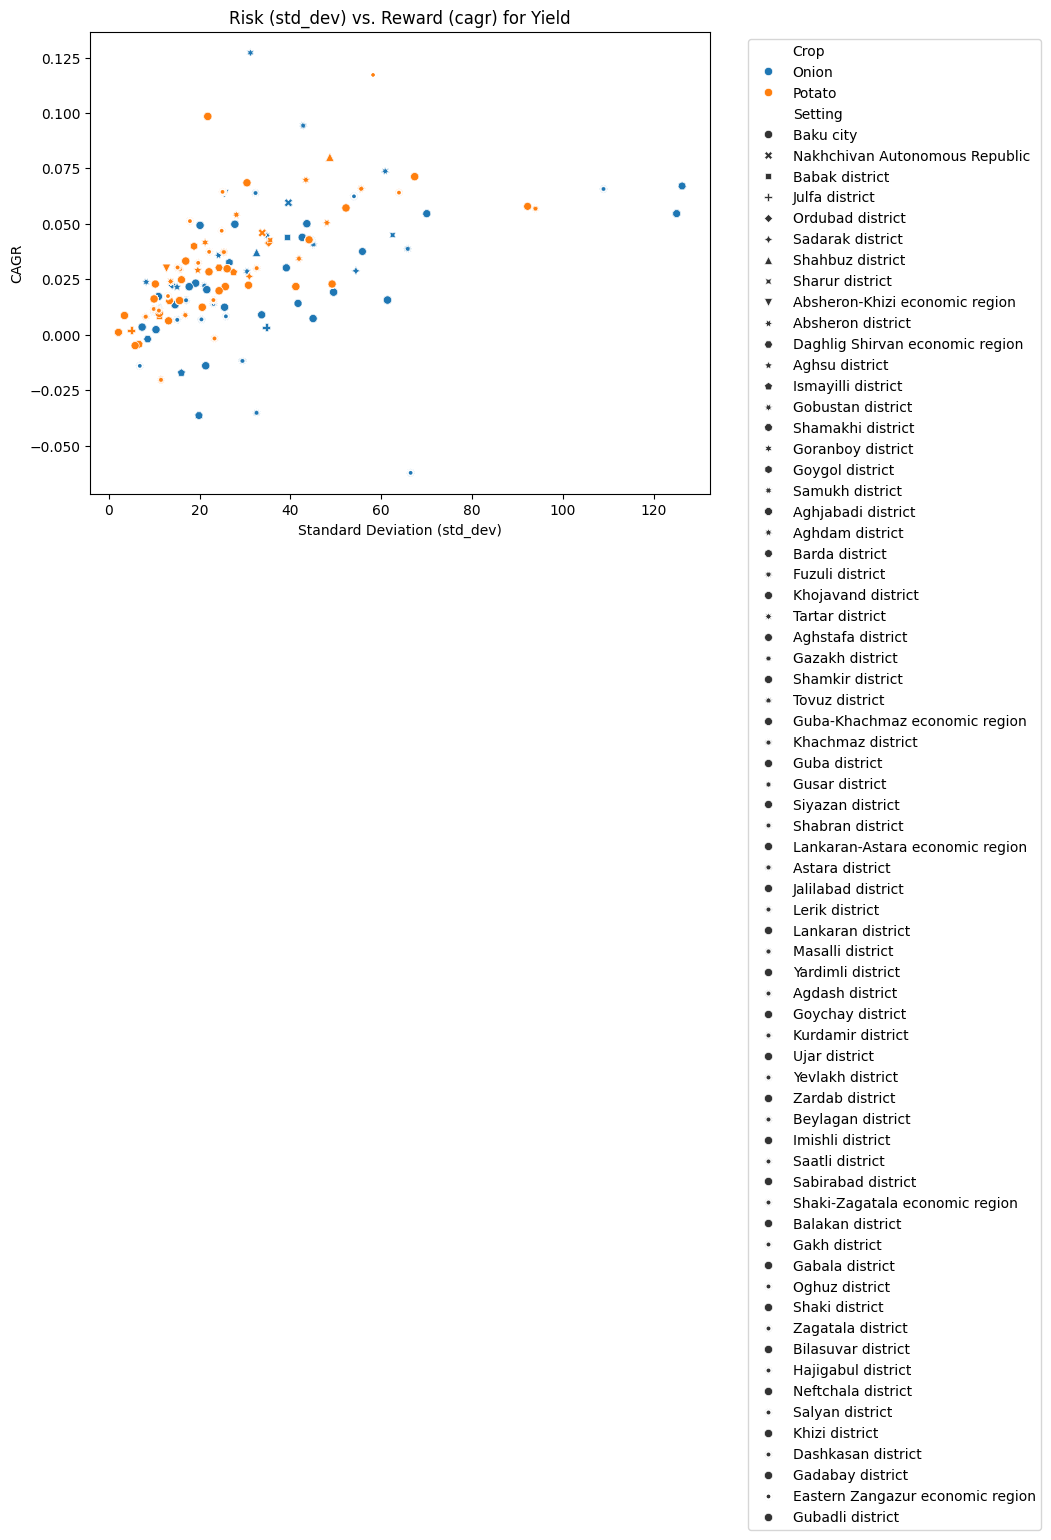

In [6]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df, 
    x='std_dev', 
    y='cagr', 
    hue='Crop',
    style='Setting'
)
plt.title("Risk (std_dev) vs. Reward (cagr) for Yield")
plt.xlabel("Standard Deviation (std_dev)")
plt.ylabel("CAGR")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


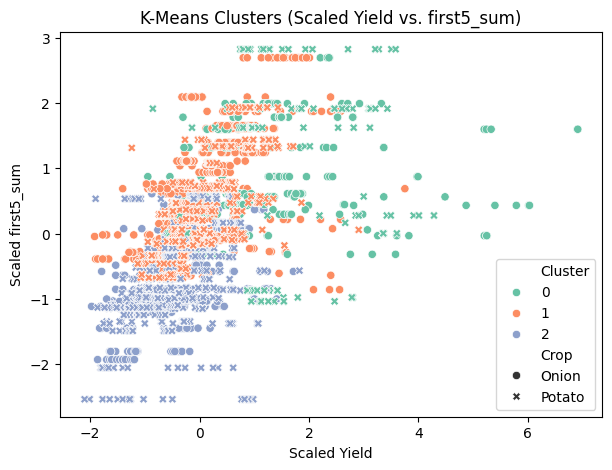

,Yield,first5_sum,last5_sum,growth,std_dev,cagr
Cluster,,,,,,
0,187.389684,592.801354,1401.394402,808.593047,68.042267,0.050543
1,115.926678,519.220994,611.396008,92.175014,19.463941,0.009862
2,89.338944,312.622202,602.155595,289.533393,30.860021,0.046345


In [7]:
features = ['Yield','first5_sum','last5_sum','growth','std_dev','cagr']
X = df[features].copy()
X.fillna(0, inplace=True)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

plt.figure(figsize=(7,5))
sns.scatterplot(
    x=X_scaled[:,0], 
    y=X_scaled[:,1], 
    hue=df['Cluster'], 
    style=df['Crop'], 
    palette='Set2'
)
plt.title("K-Means Clusters (Scaled Yield vs. first5_sum)")
plt.xlabel("Scaled Yield")
plt.ylabel("Scaled first5_sum")
plt.show()

df.groupby('Cluster')[features].mean()


In [8]:
target_col = 'growth'
model_features = ['Yield','first5_sum','std_dev','cagr']

X_train, X_test, y_train, y_test = train_test_split(
    df[model_features], 
    df[target_col], 
    test_size=0.2, 
    random_state=42
)

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

coef_df = pd.DataFrame({'Feature': model_features, 'Coefficient': lr.coef_})
print("Intercept:", lr.intercept_)
print(coef_df)

mae = np.mean(np.abs(y_pred - y_test))
r2 = lr.score(X_test, y_test)
print(f"MAE: {mae:.2f}, R^2: {r2:.2f}")


Intercept: -164.9250897222867
      Feature  Coefficient
0       Yield     0.660627
1  first5_sum    -0.016696
2     std_dev     8.547099
3        cagr  3463.106306
MAE: 100.01, R^2: 0.79


Top 5 Regions by Average Growth per Crop:
                              Setting    Crop  growth
22                     Barda district   Onion  1588.2
8                  Aghjabadi district   Onion  1473.3
24                  Beylagan district   Onion  1395.3
40                    Gazakh district  Potato  1124.7
11                  Aghstafa district  Potato  1056.5
6                     Aghdam district   Onion   806.7
39                    Gazakh district   Onion   775.0
31   Eastern Zangazur economic region  Potato   709.2
88                    Saatli district  Potato   691.6
126                   Zardab district  Potato   660.8


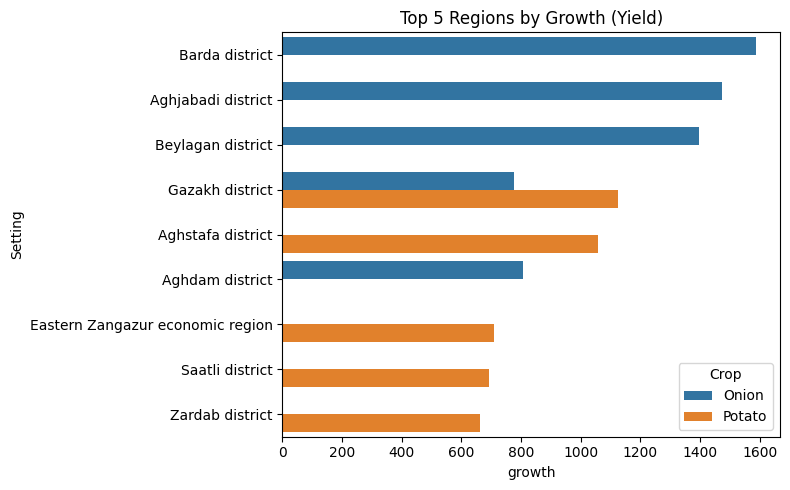

In [9]:
top5 = (
    df.groupby(['Setting','Crop'])['growth']
      .mean()
      .reset_index()
      .sort_values('growth', ascending=False)
      .groupby('Crop')
      .head(5)
)

print("Top 5 Regions by Average Growth per Crop:")
print(top5)

plt.figure(figsize=(8,5))
sns.barplot(data=top5, x='growth', y='Setting', hue='Crop')
plt.title("Top 5 Regions by Growth (Yield)")
plt.tight_layout()
plt.show()
